In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
gldm = pd.read_csv('/home/dhu/market_data/raw/20260111/GLDM.csv', index_col='Date', parse_dates=True)
voo = pd.read_csv('/home/dhu/market_data/raw/20260111/VOO.csv', index_col='Date', parse_dates=True)
ief = pd.read_csv('/home/dhu/market_data/raw/20260111/IEF.csv', index_col='Date', parse_dates=True)
lqd = pd.read_csv('/home/dhu/market_data/raw/20260111/LQD.csv', index_col='Date', parse_dates=True)

In [14]:
recent_closes = pd.concat([df['Adj Close'] for df in [gldm, voo, ief, lqd]], axis=1).dropna()
recent_closes.columns = ['GLDM Close', 'VOO Close', 'IEF Close', 'IQD Close']

In [15]:
recent_closes.head()

,GLDM Close,VOO Close,IEF Close,IQD Close
Date,,,,
2018-06-26,25.176001,221.193222,85.828384,87.421745
2018-06-27,25.040001,219.357452,86.155571,87.720161
2018-06-28,24.972000,220.693726,86.071686,87.605392
2018-06-29,25.049999,221.252335,86.004532,87.651260
2018-07-02,24.820000,221.509552,85.945709,87.662827


In [16]:
recent_closes.shift(1).head()

,GLDM Close,VOO Close,IEF Close,IQD Close
Date,,,,
2018-06-26,NaN,NaN,NaN,NaN
2018-06-27,25.176001,221.193222,85.828384,87.421745
2018-06-28,25.040001,219.357452,86.155571,87.720161
2018-06-29,24.972000,220.693726,86.071686,87.605392
2018-07-02,25.049999,221.252335,86.004532,87.651260


In [23]:
recent_log_ret = np.log(recent_closes / recent_closes.shift(1)).dropna()
recent_log_ret.columns = ['GLDM', 'VOO', 'IEF', 'IQD']

In [24]:
recent_log_ret.head()

,GLDM,VOO,IEF,IQD
Date,,,,
2018-06-27,-0.005417,-0.008334,0.003805,0.003408
2018-06-28,-0.002719,0.006073,-0.000974,-0.001309
2018-06-29,0.003119,0.002528,-0.000781,0.000523
2018-07-02,-0.009224,0.001162,-0.000684,0.000132
2018-07-03,0.010421,-0.004052,0.002540,0.003670


In [25]:
recent_log_ret.cov()

,GLDM,VOO,IEF,IQD
GLDM,0.000094,0.000011,0.000014,0.000018
VOO,0.000011,0.000155,-0.000007,0.000024
IEF,0.000014,-0.000007,0.000020,0.000019
IQD,0.000018,0.000024,0.000019,0.000037


In [26]:
recent_log_ret.corr()

,GLDM,VOO,IEF,IQD
GLDM,1.000000,0.088893,0.328881,0.304622
VOO,0.088893,1.000000,-0.121741,0.322445
IEF,0.328881,-0.121741,1.000000,0.697366
IQD,0.304622,0.322445,0.697366,1.000000


In [29]:
daily_mean = recent_log_ret.mean()
daily_vol = recent_log_ret.std()

In [32]:
annual_mean = daily_mean * 252
annual_vol = daily_vol * np.sqrt(252)

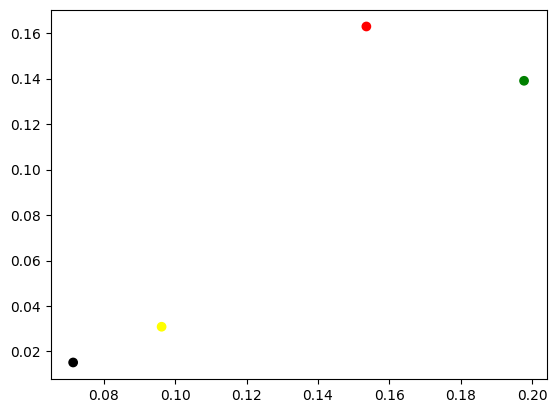

In [34]:
plt.scatter(x=annual_vol, y=annual_mean, c=['red', 'green', 'black', 'yellow'])
plt.show();

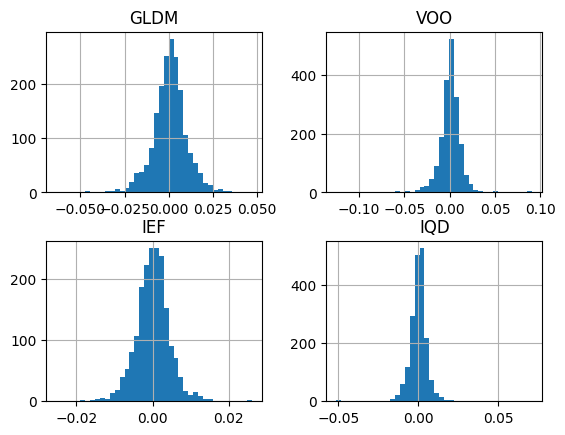

In [38]:
recent_log_ret.hist(bins=40);

In [50]:
def simulate_portfolio_frontier(log_ret, names, num_ports):
    print(f'start {len(names)}-stock simulation')
    
    np.random.seed(101)
    
    all_weights = np.zeros((num_ports, len(names))) # 1000 x 2 matrix
    ret_arr = np.zeros(num_ports) # 1000 x 1 row vector
    vol_arr = np.zeros(num_ports) # 1000 x 1 row vector
    sharpe_arr = np.zeros(num_ports) # 1000 x 1 row vector
    
    _log_ret = log_ret[names]
    
    # here is probably some vectorization we can add
    for ind in range(num_ports):
        # generate weights
        weights = np.random.random(len(names))
        weights = weights / np.sum(weights)
    
        # save weights
        all_weights[ind:] = weights 
        
        # expected return
        ret_arr[ind] = np.sum(_log_ret.mean() * weights * 252)
    
        # expected volatility
        annual_var = weights @ _log_ret.cov() @ weights
        vol_arr[ind] = np.sqrt(annual_var * 252)
        
        # sharpe ratio
        sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    print(f'finished {len(names)}-stock simulation')
    return _log_ret, ret_arr, vol_arr, sharpe_arr

In [63]:
log_ret, ret_arr, vol_arr, sharpe_arr = simulate_portfolio_frontier(recent_log_ret, ['GLDM', 'VOO', 'IQD'], 1000)

start 3-stock simulation
finished 3-stock simulation


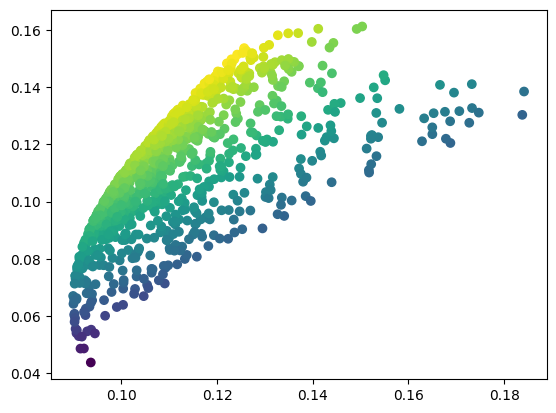

In [64]:
plt.scatter(x=vol_arr, y=ret_arr, c=sharpe_arr, cmap='viridis')

In [72]:
type(recent_log_ret.mean())

pandas.core.series.Series

In [69]:
recent_closes.head(2)

,GLDM Close,VOO Close,IEF Close,IQD Close
Date,,,,
2018-06-26,25.176001,221.193222,85.828384,87.421745
2018-06-27,25.040001,219.357452,86.155571,87.720161


In [ ]:
recent_log_ret